# Machine Learning on the Titanic Dataset

This notebook focuses on one of [Kaggle's](https://www.kaggle.com/c/titanic) "Getting Started" prediction competitions, the Titanic challenge.

In [1]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# modules to handle data
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# environment setup
sns.set()
plt.style.use('ggplot')
%matplotlib notebook

## I. Data Wrangling

Like in most cases with any data science project, we are likely to encounter dirty or missing data and will need to do some wrangling before we can really do anything else.

In [3]:
# load data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [4]:
from pycaret.classification import *

In [7]:
d=setup(data=train,
       target='Survived',
       ignore_features=['PassengerId','Name'],
       bin_numeric_features=['Age','Fare']
       )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5144
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.842500,0.000000,0.787000,0.804100,0.793700,0.666500
1,Light Gradient Boosting Machine,0.833000,0.854300,0.737100,0.816500,0.771100,0.640600
2,Ada Boost Classifier,0.816900,0.868000,0.702900,0.808800,0.747600,0.605200
3,Logistic Regression,0.808900,0.881300,0.732800,0.771800,0.746600,0.594000
4,Gradient Boosting Classifier,0.805700,0.875000,0.652700,0.818100,0.720400,0.574600
5,Extreme Gradient Boosting,0.802500,0.874800,0.669600,0.797000,0.723300,0.571500
6,CatBoost Classifier,0.802500,0.877500,0.652700,0.802700,0.716400,0.567600
7,Decision Tree Classifier,0.799200,0.784800,0.698700,0.765700,0.726600,0.568900
8,SVM - Linear Kernel,0.796100,0.000000,0.703400,0.781700,0.717600,0.561800
9,Extra Trees Classifier,0.780000,0.856100,0.665800,0.741600,0.698500,0.526500


In [11]:
rd=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7937,0.8937,0.5833,0.8235,0.6829,0.5365
1,0.8413,0.9215,0.6667,0.8889,0.7619,0.6465
2,0.8254,0.8702,0.7083,0.8095,0.7556,0.6207
3,0.8065,0.8723,0.6250,0.8333,0.7143,0.5724
4,0.8065,0.8163,0.5833,0.8750,0.7000,0.5654
5,0.8065,0.8794,0.7917,0.7308,0.7600,0.5983
6,0.7742,0.9167,0.5833,0.7778,0.6667,0.5011
7,0.6774,0.7593,0.5417,0.5909,0.5652,0.3096
8,0.8710,0.8816,0.7917,0.8636,0.8261,0.7238
9,0.8226,0.9643,0.6522,0.8333,0.7317,0.6021


In [12]:
tuned_rd=tune_model('catboost',n_iter=63)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8937,0.6667,0.8421,0.7442,0.6144
1,0.8571,0.9300,0.6667,0.9412,0.7805,0.6791
2,0.8095,0.8472,0.7500,0.7500,0.7500,0.5962
3,0.8065,0.9057,0.6250,0.8333,0.7143,0.5724
4,0.8226,0.8317,0.6250,0.8824,0.7317,0.6049
5,0.7903,0.8947,0.7917,0.7037,0.7451,0.5681
6,0.8065,0.9035,0.6250,0.8333,0.7143,0.5724
7,0.7097,0.7560,0.6250,0.6250,0.6250,0.3882
8,0.8548,0.9013,0.7917,0.8261,0.8085,0.6917
9,0.8548,0.9621,0.7391,0.8500,0.7907,0.6804


In [13]:
predict_model(tuned_rd)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8246,0.8534,0.7087,0.8111,0.7565,0.6204


,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Fare_3.0,Fare_4.0,Fare_5.0,Fare_6.0,Fare_7.0,Fare_8.0,Fare_9.0,Survived,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0031
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0027
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0272
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9873
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0027
264,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0027
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0031
266,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0032


In [14]:
final_rd = finalize_model(tuned_rd)

In [15]:
predict_model(final_rd)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,1.0,1.0,1.0,1.0,1.0,1.0


,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Fare_3.0,Fare_4.0,Fare_5.0,Fare_6.0,Fare_7.0,Fare_8.0,Fare_9.0,Survived,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0032
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0041
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0203
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9902
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0041
264,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0044
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0078
266,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0062


In [16]:
unseen_predictions = predict_model(final_rd, data=test)
unseen_predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0022
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.8108
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0009
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0082
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3725


In [17]:
# save PassengerId for final submission
passengerId = test.PassengerId

In [18]:
unseen_predictions.rename(columns={'Label':'Survived'}, inplace=True)

In [19]:
unseen_predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0022
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.8108
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0009
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0082
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0041
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1.0000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0021
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0041


In [20]:
k=unseen_predictions.values

In [21]:
pred=k[:,-2]

In [22]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': pred} )

In [23]:
kaggle

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
# save to csv
kaggle.to_csv('./Data/titanic_pycaret_catboost3.csv', index=False)

<IPython.core.display.Javascript object>


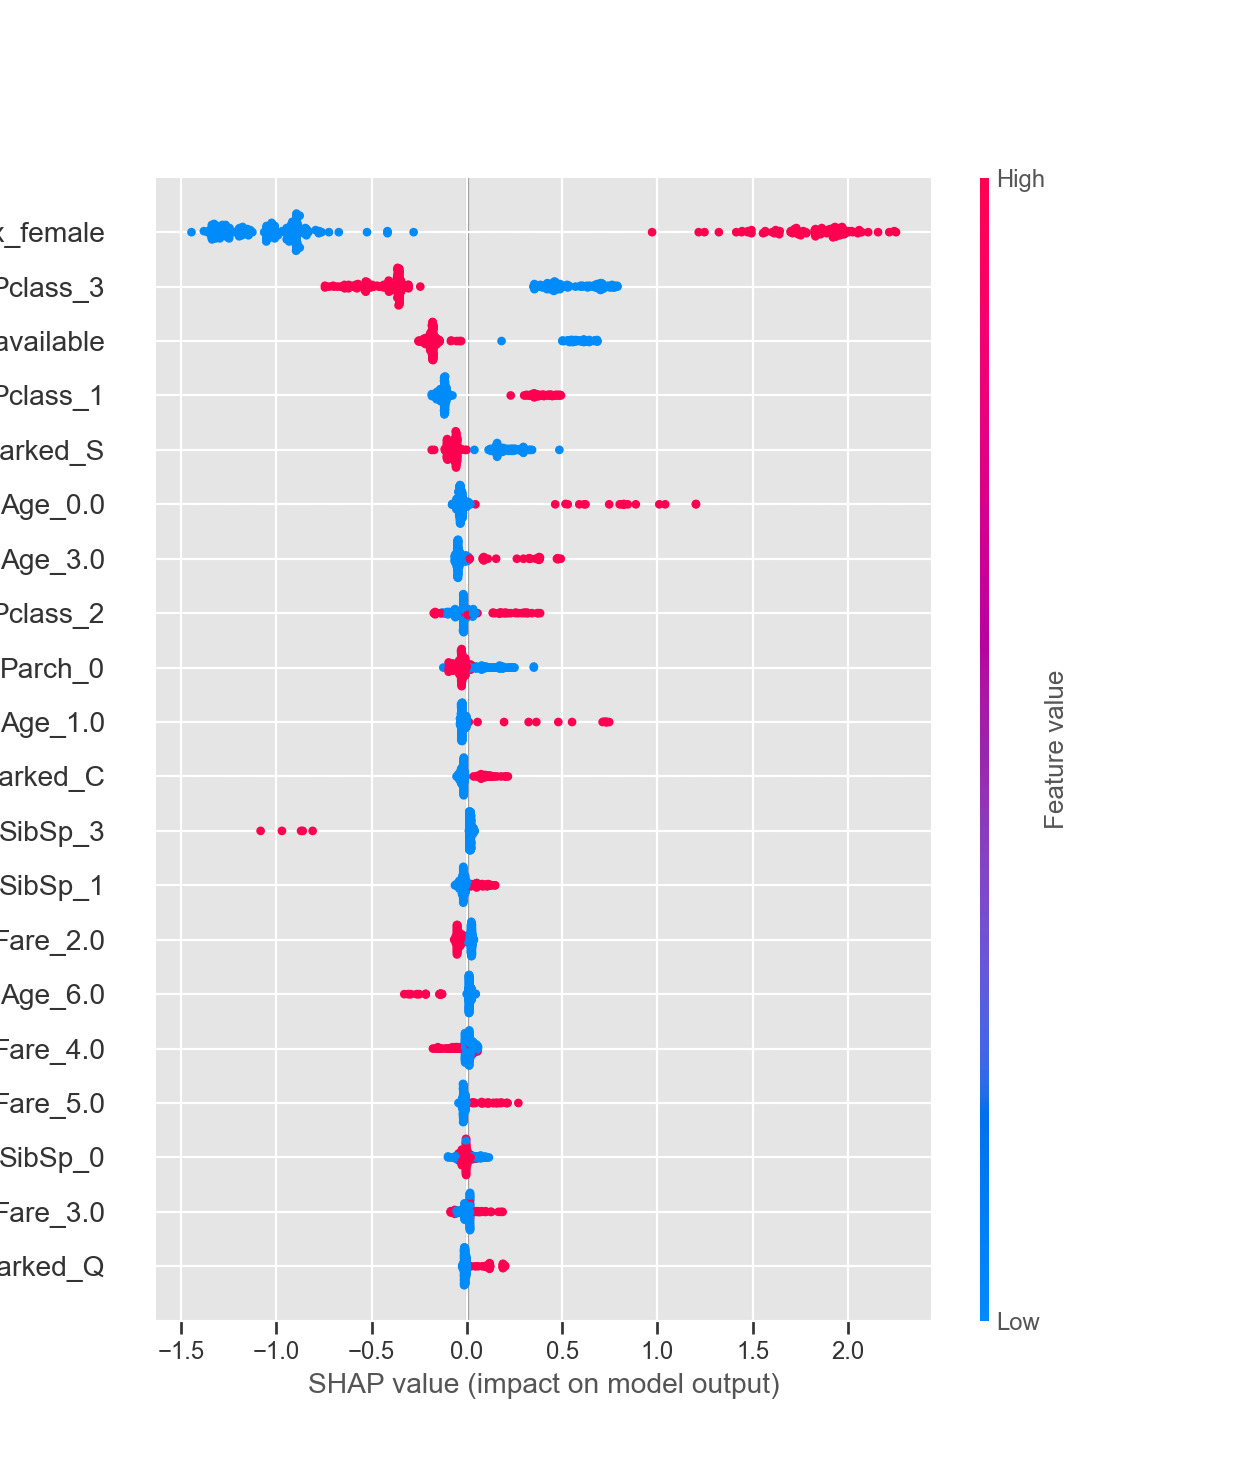

In [26]:
interpret_model(rd,plot='summary')